#**Web Scraping**

Web scraping is the term for using a program to download and process content from the Web

**webbrowser**: Comes with Python and opens a browser to a specific page.

**Requests**: Downloads files and web pages from the Internet.

**Beautiful Soup**: Parses HTML, the format that web pages are written in.

**Selenium**: Launches and controls a web browser. Selenium is able to
fill in forms and simulate mouse clicks in this browser.

##**Project: mapIt.py with the webbrowser Module**

The webbrowser module’s open() function can launch a new browser to a specified
URL.

In [ ]:
import webbrowser
webbrowser.open('http://google.com/')

**1) Read the command line arguments from sys.argv.**

**2) Read the clipboard contents.**

**3) Call the webbrowser.open() function to open the web browser. **

###**Step 1: Figure Out the URL**

Input is as given below:

C:\> mapit 870 Valencia St, San Francisco, CA 94110

URL in the address bar looks something like this: https://
www.google.com/maps/place/870+Valencia+St/@37.7590311,-122.4215096,17z/data=!3m1!4b1!4m2!3m1!1s0x808f7e3dadc07a37:0xc86b0b2bb93b73d8.

Therefore, the program can be set to open a web browser to

'https://www.google.com/maps/place/your_address_string'

###**Step 2: Handle the Command Line Arguments**



In [ ]:
if len(sys.argv) > 1:
# Get address from command line.
address = ' '.join(sys.argv[1:])

###**Step 3: Handle the Clipboard Content and Launch the Browser**



In [ ]:
import webbrowser, sys, pyperclip
if len(sys.argv) > 1:
  # Get address from command line.
  address = ' '.join(sys.argv[1:])
else:
  # Get address from clipboard.
  address = pyperclip.paste()
webbrowser.open('https://www.google.com/maps/place/' + address)

##**Downloading Files from the Web with the requests Module**

The `requests` module lets you easily download files from the Web without having to worry about complicated issues such as network errors, connection problems, and data compression.

To install requests, run the following command from command prompt

$>pip install requests

Downloading a Web Page with the requests.get() Function


The URL goes to a text web page for the entire play of Romeo and Juliet, provided on this book’s site

In [ ]:
import requests
res = requests.get('https://automatetheboringstuff.com/files/rj.txt')
res.raise_for_status()
type(res)

requests.models.Response

You can tell that the request for this web page succeeded by checking the status_code attribute of the Response object. If it is equal to the value of requests.codes.ok, then everything went fine

In [ ]:
res.status_code == requests.codes.ok

True

In [ ]:
len(res.text)

178978

In [ ]:
print(res.text[0:250])

**Checking for Errors** using raise_for_status() from response object

In [ ]:
res = requests.get('http://inventwithpython.com/page_that_does_not_exist')
res.raise_for_status()

The raise_for_status() method is a good way to ensure that a program halts if a bad download occurs. we can also use try...except

In [ ]:
import requests
res = requests.get('http://inventwithpython.com/page_that_does_not_exist')
try:
  res.raise_for_status()
except Exception as exc:
  print('There was a problem: %s' % (exc))

There was a problem: 404 Client Error: Not Found for url: http://inventwithpython.com/page_that_does_not_exist


Always call raise_for_status() after calling requests.get(). You want to be sure that the download has actually worked before your program continues.

##**Saving Downloaded Files to the Hard Drive**

Open the file in '**wb**' mode and write the content as binary data (to maintain unicoding format)

Use **iter_content()** of response object to write chunk of data at a time

In [ ]:
import requests
res = requests.get('https://automatetheboringstuff.com/files/rj.txt')
res.raise_for_status()
playFile = open('RomeoAndJuliet.txt', 'wb')
for chunk in res.iter_content(100000):
  playFile.write(chunk)
playfile.close()


#**HTML**

##**Resources for Learning HTML**

• http://htmldog.com/guides/html/beginner/

• http://www.codecademy.com/tracks/web/

• https://developer.mozilla.org/en-US/learn/html/

## **Parsing HTML with the BeautifulSoup Module**

Beautiful Soup is a module for extracting information from an HTML page.

To install Beautiful Soup version 4:

$> pip install beautifulsoup4

Beautiful Soup examples will parse (that is, analyze and identify the parts of) an HTML file on the hard drive. Therefore, create a hmtl file with following instruction and store it as example.html



In [ ]:
<!-- This is the example.html example file. -->
<html><head><title>The Website Title</title></head>
<body>
<p>Download my <strong>Python</strong> book from <a href="http://
inventwithpython.com">my website</a>.</p>
<p class="slogan">Learn Python the easy way!</p>
<p>By <span id="author">Al Sweigart</span></p>
</body></html>

Creating a BeautifulSoup Object from HTML

**import bs4**

bs4.BeautifulSoup() function needs to be called with a string containing the HTML it will parse. The bs4.BeautifulSoup() function returns is a BeautifulSoup object.

In [ ]:
import requests, bs4
res = requests.get('http://nostarch.com')
res.raise_for_status()
noStarchSoup = bs4.BeautifulSoup(res.text)
type(noStarchSoup)

bs4.BeautifulSoup

This code uses requests.get() to download the main page from the No Starch Press website and then passes the text attribute of the response to bs4.BeautifulSoup(). The BeautifulSoup object that it returns is stored in a variable named noStarchSoup.

HTML file can also be passed as input to bs4.BeautifulSoup()

In [ ]:
exampleFile = open('example.html')
exampleSoup = bs4.BeautifulSoup(exampleFile)
type(exampleSoup)

FileNotFoundError: ignored

### **Finding an Element with the select() Method**

You can retrieve a web page element from a BeautifulSoup object by calling the select() method and passing a string of a CSS selector for the element you are looking for. 

Selectors are like regular expressions: They specify a pattern to look for, in this case, in HTML pages instead of general text strings.

### CSS selector syntax

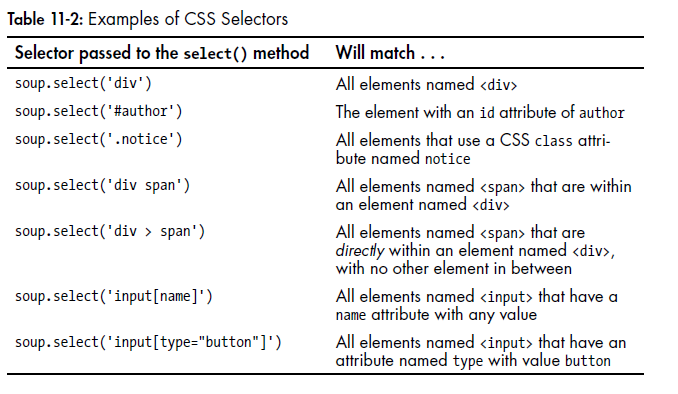

The select() method will return a list of Tag objects, which is how Beautiful Soup represents an HTML element. 

The list will contain one Tag object for every match in the BeautifulSoup object’s HTML. 

Tag values can be passed to the str() function to show the HTML tags they represent.

Tag values also have an attrs attribute that shows all the HTML attributes of the tag as a dictionary.

In [ ]:
import bs4
exampleFile = open('example.html')
exampleSoup = bs4.BeautifulSoup(exampleFile.read())
elems = exampleSoup.select('#author')
type(elems)

<class 'list'>

In [ ]:
len(elems)

1

In [ ]:
type(elems[0])

<class 'bs4.element.Tag'>

In [ ]:
elems[0].getText()

Al Sweigart

In [ ]:
str(elems[0])

<span id="author">Al Sweigart</span>

In [ ]:
elems[0].attrs

{'id': 'author'}

This code will pull the element with id="author" out of our example HTML. 

Use of select('#author') will return a list of all the elements with id="author". 
We store this list of Tag objects in the variable elems, and len(elems) tells us there is one Tag object in the list; there was one match.

Calling getText() on the element returns the element’s text, or inner HTML. 
The text of an element is the content between the opening and closing tags: in this case, 'Al Sweigart'.

Passing the element to str() returns a string with the starting and closing tags and the element’s text. 

Finally, attrs gives us a dictionary with the element’s attribute, 'id', and the value of the id attribute, 'author'.

In [ ]:
>>>pElems = exampleSoup.select('p')
>>> str(pElems[0])
'<p>Download my <strong>Python</strong> book from <a href="http://
inventwithpython.com">my website</a>.</p>'

>>> pElems[0].getText()
'Download my Python book from my website.'

>>> str(pElems[1])
'<p class="slogan">Learn Python the easy way!</p>'

>>> pElems[1].getText()
'Learn Python the easy way!'

>>> str(pElems[2])
'<p>By <span id="author">Al Sweigart</span></p>'

>>> pElems[2].getText()
'By Al Sweigart'

SyntaxError: ignored

select() gives us a list of three matches, which we store in pElems.

### **Getting Data from an Element’s Attributes**

The get() method for Tag objects makes it simple to access attribute values from an element. Just like dictionary, if we pass attribute name, it returns value corresponding to it.

In [ ]:
>>> import bs4
>>> soup = bs4.BeautifulSoup(open('example.html'))
>>> spanElem = soup.select('span')[0]
>>> str(spanElem)
'<span id="author">Al Sweigart</span>'

>>> spanElem.get('id')
'author'

>>> spanElem.get('some_nonexistent_addr') == None
True

>>> spanElem.attrs
{'id': 'author'}

we use select() to find any <span> elements and then store the first matched element in spanElem. Passing the attribute name 'id' to get() returns the attribute’s value, 'author'.

## **Project: “I’m Feeling Lucky” Google Search**

Whenever we search a topic on Google, we don’t look at just one search result at a time. By clicking a search result link, we open the first several links in a bunch of new tabs to read later.

we search Google often enough that this workflow—opening browser, searching for a topic, and clicking several links one by one—is tedious.

It would be nice if we could simply type a search term on the command line and have my computer automatically open a browser with all the top search results in new tabs.

This is what your program does:

• Gets search keywords from the command line arguments.

• Retrieves the search results page.

• Opens a browser tab for each result.

This means your code will need to do the following:

• Read the command line arguments from sys.argv.

• Fetch the search result page with the requests module.

• Find the links to each search result.

• Call the webbrowser.open() function to open the web browser.

### **Step 1: Get the Command Line Arguments and Request the Search Page**

In [ ]:
#! python3
# lucky.py - Opens several Google search results.
import requests, sys, webbrowser, bs4
print('Googling...') # display text while downloading the Google page
res = requests.get('http://google.com/search?q=' + ' '.join(sys.argv[1:]))
res.raise_for_status()

Googling...


### **Step 2: Find All the Results**

In [ ]:
# Retrieve top search result links.
soup = bs4.BeautifulSoup(res.text)
# Open a browser tab for each result.
linkElems = soup.select('.r a')

Looking through the rest of the HTML source, it looks like the r class is used only for search result links.

'.r a' to find all <a> elements that are within an element that has the r CSS class.

### **Step 3: Open Web Browsers for Each Result**


In [ ]:
# Open a browser tab for each result.
linkElems = soup.select('.r a')
numOpen = min(5, len(linkElems))
for i in range(numOpen):
  webbrowser.open('http://google.com' + linkElems[i].get('href'))

By default, you open the first five search results in new tabs using the
webbrowser module. However, the user may have searched for something that turned up fewer than five results. The soup.select() call returns a list of all the elements that matched your '.r a' selector, so the number of tabs you want to open is either 5 or the length of this list (whichever is smaller).

min() return smallest integer and max() returns the largest integer

## **Project: Downloading All XKCD Comics**

XKCD is a popular geek webcomic with a website that fits this structure (see Figure below). The front page at http://xkcd.com/ has a Prev button that guides the user back through prior comics. 


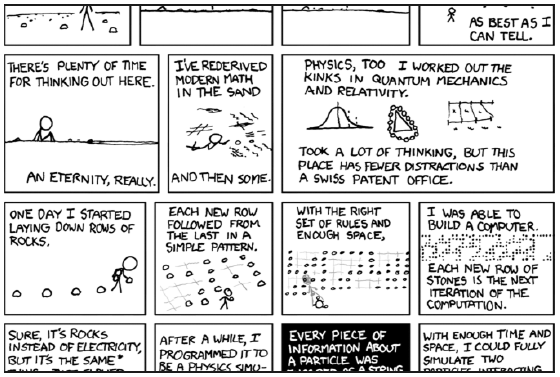

Downloading each comic by hand would take forever, but you can write a script to do this in a couple of minutes.

This means our code will need to do the following:

• Download pages with the requests module.

• Find the URL of the comic image for a page using Beautiful Soup.

• Download and save the comic image to the hard drive with iter_content().

• Find the URL of the Previous Comic link, and repeat.

### **Step 1: Design the Program**

• The URL of the comic’s image file is given by the href attribute of an <img> element.

• The `<img>` element is inside a `<div id="comic">` element.

• The Prev button has a `rel` HTML attribute with the value `prev`.

• The first comic’s Prev button links to the http://xkcd.com/# URL, indicating
that there are no more previous pages.

Make your code look like the following:

In [ ]:
#! python3
# downloadXkcd.py - Downloads every single XKCD comic.
import requests, os, bs4
url = 'http://xkcd.com' # starting url
os.makedirs('xkcd', exist_ok=True) # store comics in ./xkcd
while not url.endswith('#'):
  # TODO: Download the page.
  # TODO: Find the URL of the comic image.
  # TODO: Download the image.
  # TODO: Save the image to ./xkcd.
  # TODO: Get the Prev button's url.
print('Done.')

**Explanation:**

You’ll have a url variable that starts with the value 'http://xkcd.com' and repeatedly update it (in a for loop) with the URL of the current page’s Prev link. At every step in the loop, you’ll download the comic at url. You’ll know to end the loop when url ends with '#'.

You will download the image files to a folder in the current working directory named xkcd. The call os.makedirs() ensures that this folder exists, and the exist_ok=True keyword argument prevents the function from throwing an exception if this folder already exists. 

### **Step 2: Download the Web Page**

In [ ]:
while not url.endswith('#'):
  # Download the page.
  print('Downloading page %s...' % url)
  res = requests.get(url)
  res.raise_for_status()
  soup = bs4.BeautifulSoup(res.text)
  # TODO: Find the URL of the comic image.
  # TODO: Download the image.
  # TODO: Save the image to ./xkcd.
  # TODO: Get the Prev button's url.
print('Done.')

**Explanation:**

First, print url so that the user knows which URL the program is about to download; then use the requests module’s request.get() function to download it. As always, you immediately call the Response object’s raise_for_status() method to throw an exception and end the program if something went wrong with the download.

### **Step 3: Find and Download the Comic Image**

In [ ]:
--snip--
# Find the URL of the comic image.
comicElem = soup.select('#comic img')
if comicElem == []:
  print('Could not find comic image.')
else:
  comicUrl = 'http:' + comicElem[0].get('src')
  # Download the image.
  print('Downloading image %s...' % (comicUrl))
  res = requests.get(comicUrl)
  res.raise_for_status()
  # TODO: Save the image to ./xkcd.
  # TODO: Get the Prev button's url.
print('Done.')

**Explanation:**

From inspecting the XKCD home page, we know that the <img> element for the comic image is inside a <div> element with the id attribute set to `comic`, so the selector `'#comic img'` will get you the correct <img> element from the BeautifulSoup object.

A few XKCD pages have special content that isn’t a simple image file. That’s fine; we’ll just skip those. If our selector doesn’t find any elements, then soup.select('#comic img') will return a blank list. When that happens, the program can just print an error message and move on without downloading the image.

Otherwise, the selector will return a list containing one <img> element. We can get the src attribute from this <img> element and pass it to requests.get() to download the comic’s image file.

### **Step 4: Save the Image and Find the Previous Comic**


In [ ]:
import requests, os, bs4
  --snip--
  # Save the image to ./xkcd.
  imageFile = open(os.path.join('xkcd', os.path.basename(comicUrl)), 'wb')
  for chunk in res.iter_content(100000):
    imageFile.write(chunk)
  imageFile.close()
  # Get the Prev button's url.
  prevLink = soup.select('a[rel="prev"]')[0]
  url = 'http://xkcd.com' + prevLink.get('href')
print('Done.')

**Explanation:**
The image file of the comic is stored in the res variable. we need to write this image data to a file on the hard drive.

You’ll need a filename for the local image file to pass to open().

The comicUrl will have a value like 'http://imgs.xkcd.com/comics/heartbleed
_explanation.png'. We can call os.path.basename() with comicUrl, and it will return just the last part of the URL, 'heartbleed_explanation.png'. We can use this as the filename when saving the image to your hard drive. 

We can join this name with the name of your xkcd folder using os.path.join() so that our program uses backslashes (\) on Windows and forward slashes (/) on OS X
and Linux. Now that you finally have the filename, you can call open() to open a new file in 'wb' “write binary” mode.

This project is a good example of a program that can automatically follow links in order to scrape large amounts of data from the Web. We can learn about Beautiful Soup’s other features from its documentation at: 
http://www.crummy.com/software/BeautifulSoup/bs4/doc/.

## **Excercise:**
• Back up an entire site by following all of its links.

• Copy all the messages off a web forum.

• Duplicate the catalog of items for sale on an online store.

# **Controlling the Browser with the selenium Module**

The selenium module lets Python directly control the browser by programmatically
clicking links and filling in login information, almost as though there is a human user interacting with the page.

Selenium is used to interact with web pages in a much more advanced way than Requests and Beautiful Soup; but because it launches a web browser, it is a bit slower and hard to run in the background

Selenium module works on `firefox web browser`, can be downloaded from: http://getfirefox.com/.

To start with, we need to selenium as : `from selenium import webdriver` and then launch firefox webbrowser.

Also download geckodrivers from the following address: https://github.com/mozilla/geckodriver/releases

In [ ]:
from selenium import webdriver
browser = webdriver.Firefox()
type(browser)

In [ ]:
browser.get('http://inventwithpython.com')

### **Finding Elements on the Page**

`find_element_*` : Returns single object of first match

`find_elements_*` : Returns list of all the object based on selection query

Selenium’s WebDriver Methods for Finding Elements

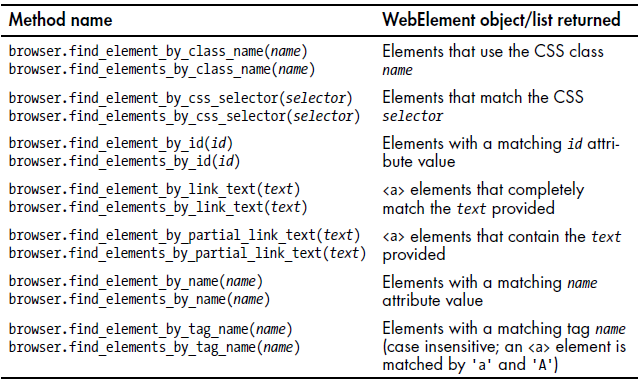

On Failure, the selenium module raises `NoSuchElement` exception

Once you have the WebElement object, you can find out more about it by reading the attributes or calling the methods

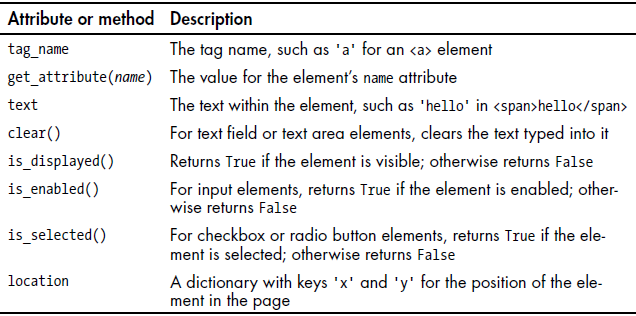

Example: we open Firefox and direct it to a URL. On this page, we try to find elements with the class name 'bookcover', and if such an element is found, we print its tag name using the tag_name attribute. If no such element was found, we print a different message.

In [ ]:
from selenium import webdriver
browser = webdriver.Firefox()
browser.get('http://inventwithpython.com')
try:
  elem = browser.find_element_by_class_name('bookcover')
  print('Found <%s> element with that class name!' % (elem.tag_name))
except:
  print('Was not able to find an element with that name.')

### **Clicking the Page**

WebElement objects returned from the find_element_* and find_elements_* methods
have a click() method that simulates a mouse click on that element.

This method can be used to follow a link, make a selection on a radio button, click a Submit button, or trigger whatever else might happen when the element is clicked by the mouse.

In [ ]:
from selenium import webdriver
browser = webdriver.Firefox()
browser.get('http://inventwithpython.com')
linkElem = browser.find_element_by_link_text('Read It Online')
type(linkElem)

In [ ]:
linkElem.click()

This opens Firefox to http://inventwithpython.com/, gets the WebElement object for the <a> element with the text Read It Online

###**Filling Out and Submitting Forms**

Sending keystrokes to text fields on a web page is a matter of finding the `<input>` or `<textarea>` element for that text field and then calling the send_keys()
method.

In [ ]:
from selenium import webdriver
browser = webdriver.Firefox()
browser.get('https://mail.yahoo.com')
emailElem = browser.find_element_by_id('login-username')
emailElem.send_keys('not_my_real_email')
passwordElem = browser.find_element_by_id('login-passwd')
passwordElem.send_keys('12345')
passwordElem.submit()

### **Sending Special Keys**

Selenium has a module for keyboard keys that are impossible to type into a string value, which function much like escape characters.

These values are stored in attributes in the `selenium.webdriver.common.key`s module. As the attribute is lengthier to follow, we can use `keys` module through `import Keys`

Following table  lists the commonly used Keys variables.

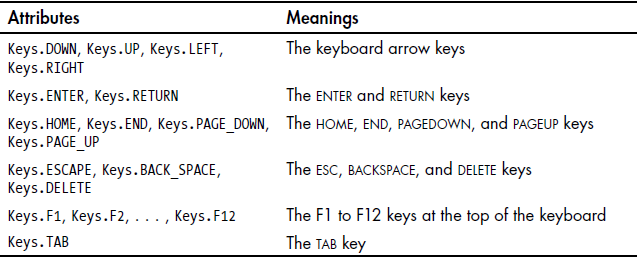


Example: send_keys() calls scroll the page

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
browser = webdriver.Firefox()
browser.get('http://nostarch.com')
htmlElem = browser.find_element_by_tag_name('html')
htmlElem.send_keys(Keys.END) # scrolls to bottom
htmlElem.send_keys(Keys.HOME) # scrolls to top

### **Clicking Browser Buttons**

Selenium can simulate clicks on various browser buttons as well through the following methods:

`browser.back()` Clicks the Back button.

`browser.forward()` Clicks the Forward button.

`browser.refresh()`  Clicks the Refresh/Reload button.

`browser.quit()` Clicks the Close Window button.

More Information on Selenium : http://selenium-python.readthedocs.org/.